<a href="https://colab.research.google.com/github/Shahidulla-Vantela/Forecasting/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/MaunaLoaDailyTemps.csv', parse_dates=['DATE'], index_col=['DATE'])
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [ ]:
ts = df['AvgTemp'].resample('M').sum()
ts.head()

,AvgTemp
DATE,
2014-01-31,1256.0
2014-02-28,1209.0
2014-03-31,1260.0
2014-04-30,1383.0
2014-05-31,1441.0


In [ ]:
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 60 entries, 2014-01-31 to 2018-12-31
Freq: ME
Series name: AvgTemp
Non-Null Count  Dtype  
--------------  -----  
60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes


In [ ]:
ts.describe()

,AvgTemp
count,60.000000
mean,1420.950000
std,95.893024
min,1168.000000
25%,1353.000000
50%,1431.500000
75%,1495.500000
max,1571.000000


In [ ]:
ts.isna().sum()

0

In [ ]:
len(ts)

60

In [ ]:
ts

,AvgTemp
DATE,
2014-01-31,1256.0
2014-02-28,1209.0
2014-03-31,1260.0
2014-04-30,1383.0
2014-05-31,1441.0
2014-06-30,1451.0
2014-07-31,1548.0
2014-08-31,1542.0
2014-09-30,1452.0


In [ ]:
ts.min()

1168.0

In [ ]:
ts.isna().sum()

0

In [ ]:
ts = pd.DataFrame(ts)

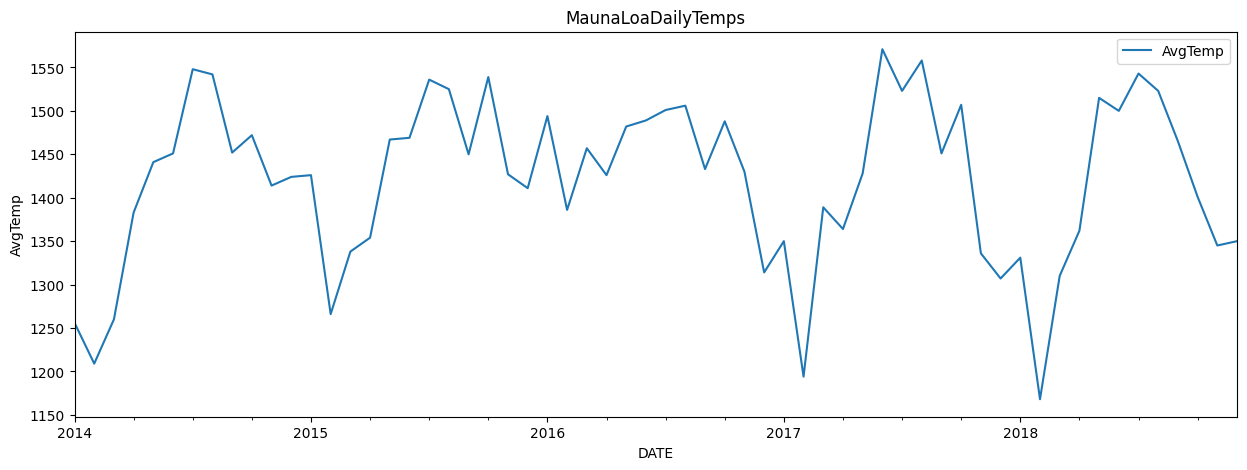

In [ ]:
ts.plot(figsize=(15,5))
plt.xlabel('DATE')
plt.ylabel('AvgTemp')
plt.title('MaunaLoaDailyTemps')
plt.legend(loc='best')
plt.show()

In [ ]:
#Rolling statistics
rollmean = ts.rolling(window=3).mean()
rollstd = ts.rolling(window=3).std()

print(rollmean)
print(rollstd)

DATE
2014-01-31            NaN
2014-02-28            NaN
2014-03-31    1241.666667
2014-04-30    1284.000000
2014-05-31    1361.333333
2014-06-30    1425.000000
2014-07-31    1480.000000
2014-08-31    1513.666667
2014-09-30    1514.000000
2014-10-31    1488.666667
2014-11-30    1446.000000
2014-12-31    1436.666667
2015-01-31    1421.333333
2015-02-28    1372.000000
2015-03-31    1343.333333
2015-04-30    1319.333333
2015-05-31    1386.333333
2015-06-30    1430.000000
2015-07-31    1490.666667
2015-08-31    1510.000000
2015-09-30    1503.666667
2015-10-31    1504.666667
2015-11-30    1472.000000
2015-12-31    1459.000000
2016-01-31    1444.000000
2016-02-29    1430.333333
2016-03-31    1445.666667
2016-04-30    1423.000000
2016-05-31    1455.000000
2016-06-30    1465.666667
2016-07-31    1490.666667
2016-08-31    1498.666667
2016-09-30    1480.000000
2016-10-31    1475.666667
2016-11-30    1450.333333
2016-12-31    1410.666667
2017-01-31    1364.666667
2017-02-28    1286.000000
2017-03

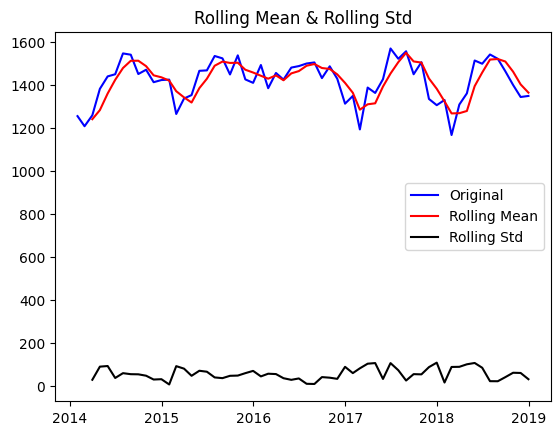

In [ ]:
plt.plot(ts, color='blue', label = 'Original')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Rolling Std')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(ts, autolag='AIC')
print("1. t test: ", dftest[0])
print("2. P value: ", dftest[1])
print("3. Num of lags: ", dftest[2])
print("4. Num of Observations: ", dftest[3])
print("5. Critical values: ")
for key, val in dftest[4].items():
  print("\t",key,":",val)

1. t test:  -6.626441607188793
2. P value:  5.8601257513832325e-09
3. Num of lags:  3
4. Num of Observations:  56
5. Critical values: 
	 1% : -3.552928203580539
	 5% : -2.9147306250000002
	 10% : -2.595137155612245


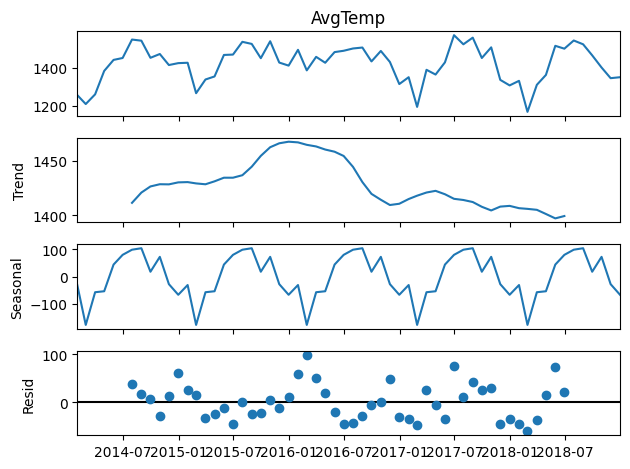

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts, model="additive")

fig = decomposition.plot()
plt.show()

In [ ]:
ts['First_diff'] = ts['AvgTemp'] - ts['AvgTemp'].shift(1)
ts.head()

,AvgTemp,First_diff
DATE,,
2014-01-31,1256.0,NaN
2014-02-28,1209.0,-47.0
2014-03-31,1260.0,51.0
2014-04-30,1383.0,123.0
2014-05-31,1441.0,58.0


<Axes: xlabel='DATE'>

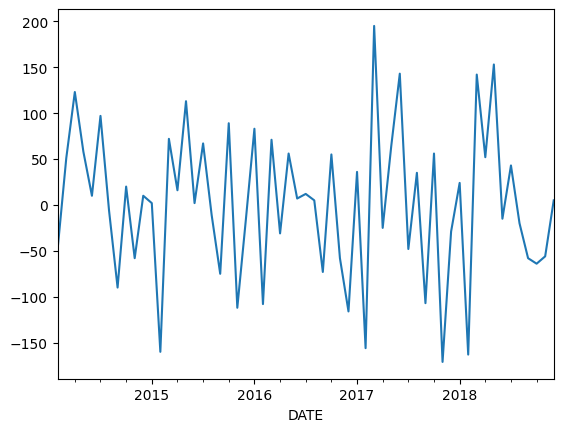

In [ ]:
ts['First_diff'].dropna().plot()

In [ ]:
ts = ts.dropna()

In [ ]:
ts.head()

,AvgTemp,First_diff
DATE,,
2014-02-28,1209.0,-47.0
2014-03-31,1260.0,51.0
2014-04-30,1383.0,123.0
2014-05-31,1441.0,58.0
2014-06-30,1451.0,10.0


In [ ]:
dftest = adfuller(ts['First_diff'], autolag='AIC')
print("1. t test: ", dftest[0])
print("2. P value: ", dftest[1])
print("3. Num of lags: ", dftest[2])
print("4. Num of Observations: ", dftest[3])
print("5. Critical values: ")
for key, val in dftest[4].items():
  print("\t",key,":",val)

1. t test:  -5.309877520279033
2. P value:  5.22349577496339e-06
3. Num of lags:  10
4. Num of Observations:  48
5. Critical values: 
	 1% : -3.5745892596209488
	 5% : -2.9239543084490744
	 10% : -2.6000391840277777


In [ ]:
ts['Seasonal_diff'] = ts['AvgTemp'] - ts['AvgTemp'].shift(12)
ts.head()

,AvgTemp,First_diff,Seasonal_diff
DATE,,,
2014-02-28,1209.0,-47.0,NaN
2014-03-31,1260.0,51.0,NaN
2014-04-30,1383.0,123.0,NaN
2014-05-31,1441.0,58.0,NaN
2014-06-30,1451.0,10.0,NaN


In [ ]:
ts = ts.dropna()

In [ ]:
dftest = adfuller(ts['Seasonal_diff'], autolag='AIC')
print("1. t test: ", dftest[0])
print("2. P value: ", dftest[1])
print("3. Num of lags: ", dftest[2])
print("4. Num of Observations: ", dftest[3])
print("5. Critical values: ")
for key, val in dftest[4].items():
  print("\t",key,":",val)

1. t test:  -4.086774317566365
2. P value:  0.0010184424235601453
3. Num of lags:  0
4. Num of Observations:  46
5. Critical values: 
	 1% : -3.5812576580093696
	 5% : -2.9267849124681518
	 10% : -2.6015409829867675


<Axes: xlabel='DATE'>

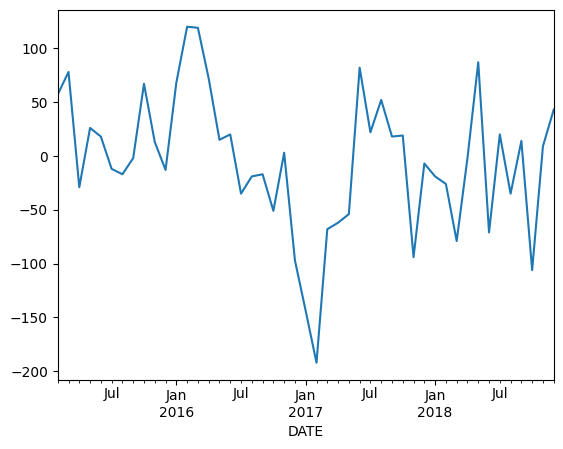

In [ ]:
ts['Seasonal_diff'].plot()

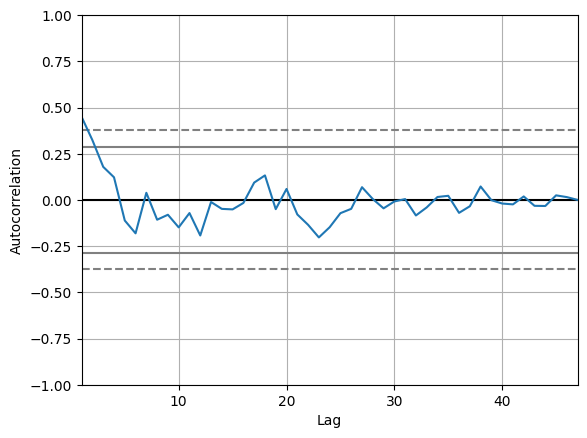

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts['Seasonal_diff'])
plt.show()

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima

order = auto_arima(ts['Seasonal_diff'], supress_warnings=True)
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   47
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -256.711
Date:                Sat, 23 Nov 2024   AIC                            517.422
Time:                        09:48:38   BIC                            521.123
Sample:                    02-28-2015   HQIC                           518.815
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4562      0.118      3.877      0.000       0.226       0.687
sigma2      3232.5830    763.733      4.233      0.000    1735.693    4729.473
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.60   Prob(JB):                         0.47
Heteroskedasticity (H):               1.75   Skew:                            -0.38
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
ts.head()

,AvgTemp,First_diff,Seasonal_diff
DATE,,,
2015-02-28,1266.0,-160.0,57.0
2015-03-31,1338.0,72.0,78.0
2015-04-30,1354.0,16.0,-29.0
2015-05-31,1467.0,113.0,26.0
2015-06-30,1469.0,2.0,18.0


In [ ]:
len(ts)

47

In [ ]:
ts.shape

(47, 3)

In [ ]:
train = ts[:40]
test = ts[40:]

In [ ]:
train.shape, test.shape

((40, 3), (7, 3))

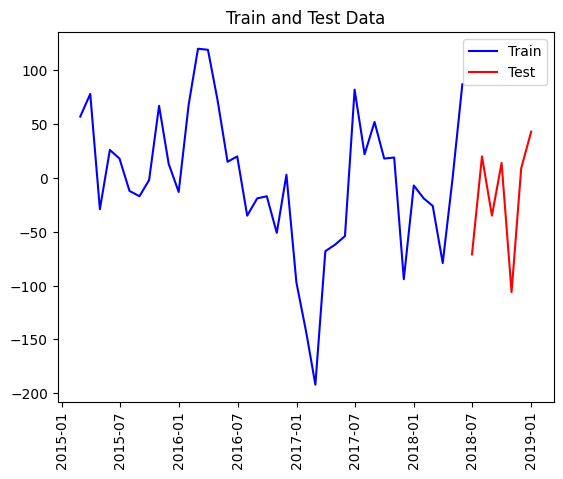

In [ ]:
plt.plot(train['Seasonal_diff'], label='Train', color='blue')
plt.plot(test['Seasonal_diff'], label='Test', color='red')
plt.legend(loc='best')
plt.title('Train and Test Data')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
train.head(40)

,AvgTemp,First_diff,Seasonal_diff
DATE,,,
2015-02-28,1266.0,-160.0,57.0
2015-03-31,1338.0,72.0,78.0
2015-04-30,1354.0,16.0,-29.0
2015-05-31,1467.0,113.0,26.0
2015-06-30,1469.0,2.0,18.0
2015-07-31,1536.0,67.0,-12.0
2015-08-31,1525.0,-11.0,-17.0
2015-09-30,1450.0,-75.0,-2.0
2015-10-31,1539.0,89.0,67.0


In [ ]:
test.head(8)

,AvgTemp,First_diff,Seasonal_diff
DATE,,,
2018-06-30,1500.0,-15.0,-71.0
2018-07-31,1543.0,43.0,20.0
2018-08-31,1523.0,-20.0,-35.0
2018-09-30,1465.0,-58.0,14.0
2018-10-31,1401.0,-64.0,-106.0
2018-11-30,1345.0,-56.0,9.0
2018-12-31,1350.0,5.0,43.0


In [ ]:
import itertools
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
p = range(0,8)
d= range(0,2)
q = range(0,8)
pdq_combinations = list(itertools.product(p,d,q))

In [ ]:
len(pdq_combinations)

128

In [ ]:
pdq_combinations

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 0, 6),
 (0, 0, 7),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 0, 6),
 (1, 0, 7),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 1, 6),
 (1, 1, 7),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 0, 6),
 (2, 0, 7),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 1, 5),
 (2, 1, 6),
 (2, 1, 7),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 0, 5),
 (3, 0, 6),
 (3, 0, 7),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 1, 4),
 (3, 1, 5),
 (3, 1, 6),
 (3, 1, 7),
 (4, 0, 0),
 (4, 0, 1),
 (4, 0, 2),
 (4, 0, 3),
 (4, 0, 4),
 (4, 0, 5),
 (4, 0, 6),
 (4, 0, 7),
 (4, 1, 0),
 (4, 1, 1),
 (4, 1, 2),
 (4, 1, 3),
 (4, 1, 4),
 (4, 1, 5),
 (4, 1, 6),
 (4, 1, 7),
 (5, 0, 0),
 (5, 0, 1),
 (5, 0, 2),
 (5,

In [ ]:
rmse = []
order1 = []

In [ ]:
sample_train = train['Seasonal_diff']
sample_test = test['Seasonal_diff']

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

for pdq in pdq_combinations:
  try:
    model=ARIMA(train['Seasonal_diff'], order=pdq).fit()
    pred=model.predict(start=len(train),end=(len(ts)-1))
    #pred_series = pd.Series(pred, index=test.index)
    error=np.sqrt(mean_squared_error(test['Seasonal_diff'],pred))
    order1.append(pdq)
    rmse.append(error)

  except Exception as e:
    print(f"Error fitting ARIMA model with order {pdq}: {e}")  # Print the error message
    continue

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

In [ ]:
min(rmse)

49.16668481158713

In [ ]:
result = pd.DataFrame(index=order1, data=rmse, columns=['RMSE'])
result

,RMSE
"(0, 0, 0)",52.827534
"(0, 0, 1)",60.453356
"(0, 0, 2)",68.897739
"(0, 0, 3)",68.773627
"(0, 0, 4)",77.160927
...,...
"(7, 1, 3)",52.529053
"(7, 1, 4)",53.235411
"(7, 1, 5)",74.378141
"(7, 1, 6)",66.127414


In [ ]:
result.to_csv('result.csv')

In [ ]:
result.head()

,RMSE
"(0, 0, 0)",52.827534
"(0, 0, 1)",60.453356
"(0, 0, 2)",68.897739
"(0, 0, 3)",68.773627
"(0, 0, 4)",77.160927


In [ ]:
result.describe()

,RMSE
count,128.000000
mean,67.343771
std,11.296639
min,49.166685
25%,58.334520
50%,67.054763
75%,72.499718
max,116.456614


In [ ]:
min_rmse_index = np.where(result['RMSE'] == result['RMSE'].min())
min_rmse_index

(array([79]),)

In [ ]:
# prompt: how to find index of min_rmse_index

min_rmse_index = result['RMSE'].idxmin()
min_rmse_index

'(4, 1, 7)'

In [ ]:
model=ARIMA(train['Seasonal_diff'],order=(4,1,7))
model=model.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Seasonal_diff   No. Observations:                   40
Model:                 ARIMA(4, 1, 7)   Log Likelihood                -206.691
Date:                Sat, 23 Nov 2024   AIC                            437.381
Time:                        10:01:20   BIC                            457.344
Sample:                    02-28-2015   HQIC                           444.544
                         - 05-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6155      0.984     -1.641      0.101      -3.545       0.314
ar.L2         -1.0306      0.989     -1.042      0.297      -2.968       0.907
ar.L3         -0.7280      0.540     -1.348      0.178      -1.786       0.330
ar.L4         -0.4149      0.320     -1.296      0.195      -1.042       0.213
ma.L1          1.2779     65.972      0.019      0.985    -128.024     130.580
ma.L2          0.3155     96.741      0.003      0.997    -189.293     189.924
ma.L3          0.1844    159.480      0.001      0.999    -312.392     312.760
ma.L4         -0.0843    131.924     -0.001      0.999    -258.651     258.482
ma.L5         -0.7651    159.800     -0.005      0.996    -313.968     312.438
ma.L6         -1.2259    192.426     -0.006      0.995    -378.375     375.923
ma.L7         -0.7012     84.715     -0.008      0.993    -166.740     165.338
sigma2      1801.6787   2.18e+05      0.008      0.993   -4.26e+05    4.29e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.75
Prob(Q):                              0.87   Prob(JB):                         0.42
Heteroskedasticity (H):               1.48   Skew:                            -0.17
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pred_ar = model.predict(start=len(train),end=(len(ts)-1))

In [ ]:
pred_ar.head()

,predicted_mean
2018-06-30,-16.185045
2018-07-31,47.088414
2018-08-31,6.593896
2018-09-30,76.114050
2018-10-31,-35.455854


In [ ]:
error_ar = np.sqrt(mean_squared_error(test['Seasonal_diff'],pred_ar))
error_ar

49.16668481158713

In [ ]:
test['Seasonal_diff'].mean(), np.sqrt(test['Seasonal_diff'].var())

(-18.0, 54.405882034941776)

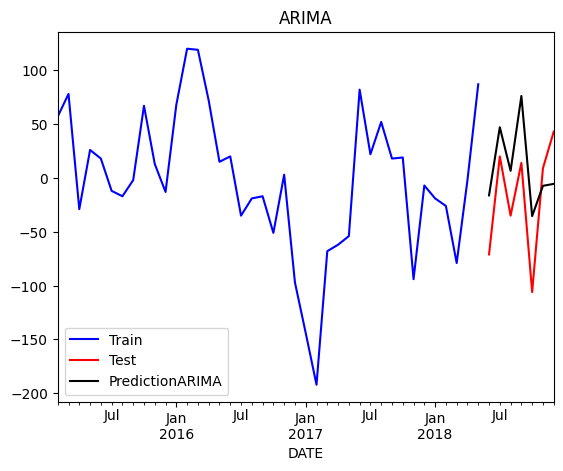

In [ ]:
train['Seasonal_diff'].plot(legend=True, color='blue', label='Train')
test['Seasonal_diff'].plot(legend=True, color='red', label='Test')
pred_ar.plot(legend=True, color='black', label='PredictionARIMA')
plt.title('ARIMA')
plt.show()

In [ ]:
final_model = ARIMA(ts['Seasonal_diff'], order=(4,1,7))
final_model = final_model.fit()
prediction = final_model.predict(start=len(ts), end=(len(ts)+11))

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
prediction.head()

,predicted_mean
2019-01-31,-9.449985
2019-02-28,61.878207
2019-03-31,8.987852
2019-04-30,29.011718
2019-05-31,-40.699951


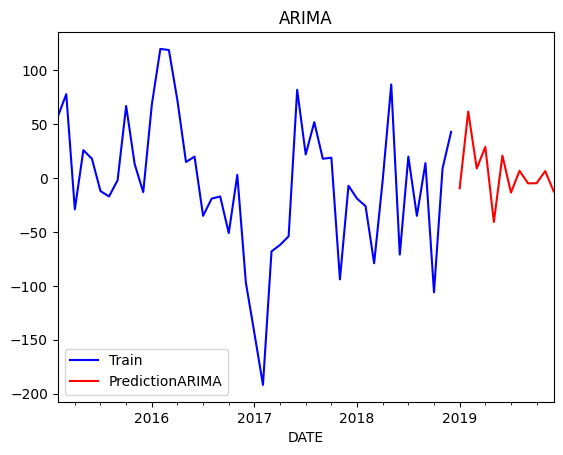

In [ ]:
ts['Seasonal_diff'].plot(legend=True, color='blue', label='Train')
prediction.plot(legend=True, color='red', label='PredictionARIMA')
plt.title('ARIMA')
plt.show()

Garsh
Sarimax
Arima - t-batch
resample with mean